## Introduction

In this project we have choosen to analyze a simple two period economic model with two different social security systems, more specifically the pay-as-you-go system and the fully funded system.
First, we import the relevant packages:


In [2]:
import numpy as np
import matplotlib.pyplot as plt  # So that we can do our graphical analysis
plt.style.use('ggplot') # Choice of plotstyle.
import ipywidgets as widgets # So that we can create our interactive figure
from scipy import optimize # To be able to optimize
import sympy as sm # What we will use when solving for steady state
from sympy import symbols # For when we have to define our variables
from sympy.plotting import plot # So that we can plot our Solow Diagram

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Importing the local module (modelproject.py)
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


>**Note**: Most of the following model is taken from the MacroIII exam Winter 2019

In this model we have:
* $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n>0$)

Identical competitive firms maximize their profits using the Cobb-Douglas technology:
* $Y_t = K^{\alpha}_tL^{1-\alpha}_t$ with $\alpha\in (0,1)$

So, we have
$$ F(K_{t},L_{t})=K_{t}^{\alpha}L_{t}^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha} $$

Assume full depreciation ($\delta = 0$)

With these assumptions, profit maximization leads to the following:
$$1+r_t = \alpha k^{\alpha-1}_t$$
$$w_t = (1-\alpha)k^{\alpha}_t$$

Utility for the young individuals born in period t is:
$$ U_t = lnc_{1t} + \frac{1}{1+\rho} lnc_{2t+1} $$  with $\rho >-1.$

To start, the government runs a pay-as-you-go (PAYG) social security system where the young pay the contribution $d_t$ that is the fraction $\tau \in (0,1)$ of their wages.

Finally, we have the following budget constraints:
$$ c_{1t} + s_t = (1-\tau)w_t $$
$$ c_{2t+1} = s_t (1+r_{t+1})+(1+n)d_{t+1} $$

Now, we will find the capital-per-worker in steady state.
Under the PAYG system, we can derive the Euler equation:
$$ c_{2t+1} = \frac{1+r_{t+1}}{1+\rho}c_{1t} $$
Replacing $c_{1t}$ and $c_{2t+1}$ with their budget constraints yields the savings equation:
$$ s_t=\frac{1}{2+\rho}w_t(1-\tau)-\tau \frac{1+\rho}{2+\rho} \frac{1+n}{1+r_{t+1}}w_{t+1} $$
From this it is straightforward (using $k_{t+1}=\frac{s_t}{1+n}$ and the equilibrium conditions) finding the capital accumulation equation:
$$ k_{t+1} = \frac{1}{1+\frac{1+\rho}{2+\rho}\cdot\frac{(1-\alpha)}{\alpha}\cdot\tau}\cdot\left[\frac{(1-\alpha)(1-\tau)}{(1+n)(2+\rho)}\cdot{k_t}^\alpha\right] $$

In the following, we will look at the Analytical solution and the numerical soluation of this specific model for choosen parametervalues. 

## Analytical solution

We want to show that the capital-per-worker in steady state is:
$$ \bar k =\left[\frac{1}{1+\frac{1+\rho}{2+\rho}\frac{(1-\alpha)}{\alpha}\tau}\frac{(1-\alpha)}{(1+n)}\frac{(1-\tau)}{(2+\rho)}\right]^\frac{1}{1-\alpha} $$

In [3]:
# We can use sympy to analytically find the steady state expression
# First, we define all the symbols:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
rho = sm.symbols('rho')
tau = sm.symbols('tau')
n = sm.symbols('n')

In [4]:
# Next, we can define the capital accumulation equation and ensure that it is printing it out correctly (which we see it is)
ss = sm.Eq(k,((((1-alpha)*(1-tau))/((1+n)*(2+rho)))*k**alpha)/(1+((1+rho)/(2+rho))*((1-alpha)/alpha)*tau))
ss

Eq(k, k**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

In [21]:
# We solve for the Steady State:
kss = sm.solve(ss,k)[0]
sm.simplify(kss)

((-alpha*n*rho*tau + alpha*n*rho - alpha*n*tau + 2*alpha*n - alpha*rho*tau + alpha*rho - alpha*tau + 2*alpha + n*rho*tau + n*tau + rho*tau + tau)/(alpha*(alpha*tau - alpha - tau + 1)))**(1/(alpha - 1))

>**Note**: As you can see from the output above, we find an expression that is rather long and complicated. We have tried alot and spent alot of time on it, but we can't seem to make it work for us so that we get the exact equation. It works for us later on, when we find the other Steady State. 

In [9]:
# We turn this steady state solution for capital-per-worker into a Python function to use below in the numerical solution
ss_func = sm.lambdify((n,tau,rho,alpha),kss)

## Numerical Solution
In this section we will parametrizise and find the numerical solution.

We will now define our objective function. More specifically, re-writing our steady state for the capital-per-worker (moving $k^*$ to the other side), we can get a **root-finding problem** which can be solved with the bisection method.
$$ 0= \frac{1}{(2+\rho)(1+n)}(1-\tau)(1-\alpha)f(\tilde{k}_{t}) - \frac{1+\rho}{2+\rho}\tau \frac{1-\alpha}{\alpha}{k}^{\ast}-{k}^{\ast} $$

In [10]:
# We define some model parameters:
n = 0.01
tau = 0.1
rho = 0.3
alpha = 1/3

# We solve numerically for the steady state (see code in the local module modelproject.py):
solution = modelproject.solve_for_ss(n,tau,rho,alpha)

# We print the two solutions:
print(f'Analytical solution is: {ss_func(n,tau,rho,alpha):.3f}')
print(f'Numerical solution is: {solution.root:.3f}')

Analytical solution is: 0.112
Numerical solution is: 0.112


From these results we see that the steady state level of capital-per-worker is 0.112 under the pay-as-you-go social security system under these circumstances and parametersizes.

## Further Analysis

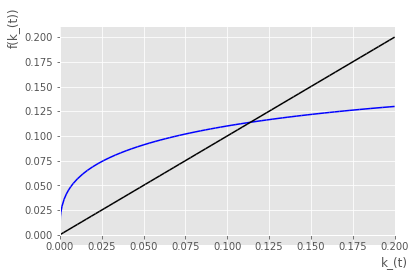

In [11]:
# We can visualize the steady state in a Solow Diagram for parametervalues n=0.01, tau=0.1, rho=0.3 and alpha=1/3 to see how the equations develops over time:
x = symbols('k_(t)')
p1 = plot((0.26*x**0.33-0.115*x),(x, 0, 0.2), show=False, line_color='b') # Displaying the capital accumulation locus
p2 = plot(x,(x, 0, 0.2), show=False, line_color='black') # Displaying the 45degree line
p1.append(p2[0]) # Combining the two plots in one diagram
p1.show()

In this diagram we can find the Steady State value where the 45degree line crosses the capital line, which we see is 0.112 like we found in our solutions above.

In [12]:
# We will now visualize the steady state value for different values of n,tau,rho
# This is to display how a change in the three variables change the Steady State value
def interactive_figure(n,tau,rho):
    fig = plt.figure() 
    ax = fig.add_subplot(1,1,1)
    ax.plot(ss_func(n,tau,rho,alpha),'o',label='SS PAYG') # Plot of SS under PAYG
    ax.legend(loc='lower right',facecolor='white',frameon=True) # Box with name of plot down right
    ax.set_ylabel('$Capital$') # Label of y-axis
    ax.set_xlim([-0.5,0.5]) # The length of the x-axis
    ax.set_ylim([-0.2,0.4]) # The length of the y-axis
    plt.suptitle('Capital in Steady State', size = 20) # Giving the diagram a title
    
# We create the sliders for the variables n, tau and rho:
widgets.interact(interactive_figure,
    n=widgets.FloatSlider(description="n", min=0, max=3, step=0.05,), 
    tau=widgets.FloatSlider(description="tau", min=0, max=0.5, step=0.05,),
    rho=widgets.FloatSlider(description="rho", min=0, max=0.5, step=0.05,) 
);

interactive(children=(FloatSlider(value=0.0, description='n', max=3.0, step=0.05), FloatSlider(value=0.0, desc…

We see that for higher n,tau and rho respectively, we get a lower steady state capital-per-worker under the PAYG social security system.
The higher n means a larger population and this hollows out capita-per-worker as the capital has to be spread out between more people.
A higher tau lowers capital in two ways:
1. There is less income when young
2. You recieve income when old.
Hence, there is less incentive to save when young.
Finally, a rise in rho means a decrease in the patience of the consumer. When consumers are less patient they save less and consume more now. Hence, less capital is accumulated. 

## An Extension/Change of Our Baseline Model
Now we suppose that the government at time T decides to switch to the fully funded social security system where the young pay a contribution $d_T$ which amounts to a fraction $\tau\in (0,1)$ of their wages.
These contributions are paid out the next period together with the interest rate. The new budget constraints are:
$$ c_{1t}+s_t = (1-\tau)w_t $$
$$ c_{2t+1} = (s_t+\tau w_t)(1+r_{t+1})  ,    t\ge T $$


In this case we need to find a new steady state capital-per-worker.


Following the same procedure as above, we get the following capital accumulation equation:
$$ k_{t+1} = \frac{s_t+d_t}{1+n}=\frac{1}{(1+n)(2+\rho)}(1-\alpha)f{(\tilde{k_t})} $$

We want to find the following Steady State level of capital-per-worker:
$$ \bar k' = \left[\frac{(1-\alpha)}{(1+n)(2+\rho)}\right]^\frac{1}{1-\alpha}$$


In [14]:
# Again, we can use sympy to analytically find the steady state expression
# We define all the symbols:
k1 = sm.symbols('k1')
alpha1 = sm.symbols('alpha1')
rho1 = sm.symbols('rho1')
tau1 = sm.symbols('tau1')
n1 = sm.symbols('n1')

In [15]:
# We define the capital accumulation equation and solve for k to find the Steady State value:
ss1 = sm.Eq(k1,((1/((2+rho1)*(1+n1)))*(1-alpha1)*k1**alpha1))
kss1 = sm.solve(ss1,k1)[0]
kss1

((1 - alpha1)/(n1*rho1 + 2*n1 + rho1 + 2))**(-1/(alpha1 - 1))

By looking at this output and the Steady State capital-per-worker we wanted to find, it is easy to see that it is indeed the same and what we wanted.

In [16]:
# We turn it into a Python function
ss1_func = sm.lambdify((n1,tau1,rho1,alpha1),kss1)

We define the objective function in this case so that we can find the numerical solution.
$$ 0 = \frac{1}{(1+n)(2+\rho)}(1-\alpha)f(\bar{k}_{t}) - {k}^{\ast}$$

In [17]:
# In the following, we use a different method compared to the one before
# We define some model parameters:
n1 = 0.01
tau1 = 0.1
rho1 = 0.3
alpha1 = 1/3

# We solve numerically for the steady state:
f = lambda k1: k1**alpha1
obj_kss1 = lambda kss1: kss1 - ((1/((1+n1)*(2+rho1)))*(1-alpha1)*f(kss1)) # Our objective function
result1 = optimize.root_scalar(obj_kss1,bracket=[0.1,100],method='brentq') # Our method used for the optimization
print(f'The Steady State for k is:',result1.root)

The Steady State for k is: 0.15374085667498896


So, the steady state level of capital-per-worker is 0.154 under the Fully Funded social security system under these circumstances and parametersizes. 

Now, we can also find the steady state capital-per-worker in this case for different values of $\alpha_1$.

In [57]:
alphas = [0,0.1,0.2,1/3]
for alpha1 in alphas:
    f = lambda k1: k1**alpha1
    obj_kss1 = lambda kss1: kss1 - ((1/((1+n1)*(2+rho1)))*(1-alpha1)*f(kss1))
    result1 = optimize.root_scalar(obj_kss1,bracket=[0.1,100],method='brentq')
    print(f'For alpha1 = {alpha1:.3f}, the Steady State for k is:',result1.root)

For alpha1 = 0.000, the Steady State for k is: 0.43047783039173493
For alpha1 = 0.100, the Steady State for k is: 0.3486879984656627
For alpha1 = 0.200, the Steady State for k is: 0.26381590295580987
For alpha1 = 0.333, the Steady State for k is: 0.15374085667498896


The closer alpha is to 1 the smaller are the diminishing returns and if every unit of capital produces less, at one point capital will stop accumulating.

Text(0.5, 1.0, 'Capital in Steady State')

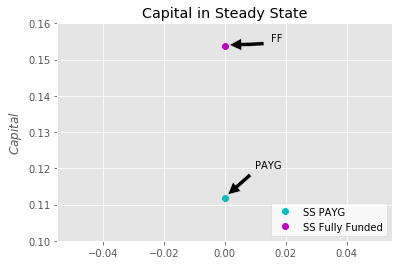

In [19]:
# We will now visualize the steady state value for both social security systems side by side
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(ss_func(n,tau,rho,alpha),'o',label='SS PAYG', color='c') # Plotting the Steady State under PAYG
plt.annotate('PAYG', xy=(0, 0.112), xytext=(0.01, 0.12),arrowprops=dict(facecolor='black', shrink=0.1),) # Adding the arrow
ax1 = fig.add_subplot(1,1,1)
line1, = ax1.plot(ss1_func(n,tau,rho,alpha),'o',label='SS Fully Funded',color='m') # Plotting the Steady State under Fully Funded
plt.annotate('FF', xy=(0, 0.154), xytext=(0.015, 0.155),arrowprops=dict(facecolor='black', shrink=0.1),) # Adding the arrow
plt.ylim(0.1, 0.16)
ax.legend(loc='lower right',facecolor='white',frameon=True) # Adding the box down right
ax.set_ylabel('$Capital$') # Adding the label on the y-axis
ax.set_title('Capital in Steady State') # Adding a title to the diagram

## Conclusion

Comparing the two shows us that the capital-per-worker under the pay-as-you-go social security system is larger than what it is under the fully funded social security system for the same parametervalues in this model. 
This makes sense as the Fully Funded social security system does not have an effect on the capital accumulation because Public savings exactly offset private savings. Under the PAYG system though, there is this offsetting effect from tau mentioned above.